In [ ]:
import tweepy
import webbrowser
import time
from tweepy import Stream
from tweepy.streaming import StreamListener
from tweepy import Cursor
from tweepy import API
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt


consumer_key = '5iM7WsOnBxmuLwg7N4yFgRGgv'
consumer_secret ='AprvWHmF9hXWdbEYPMUE3vq4dnJHmRrx7GCJZbi3g4IWPrTFZ3'

callback_url= 'oob'

auth= tweepy.OAuthHandler(consumer_key,consumer_secret,callback_url) # Authenticate our User
redirect_url = auth.get_authorization_url() # Get URL to direct user
# print(redirect_url)

webbrowser.open(redirect_url)
user_pint_input = input ("What's the pin value? ")

user_pint_input

auth.get_access_token(user_pint_input)

api= tweepy.API(auth)

me = api.me()
# print(me.screen_name)

In [ ]:
class TwitterClient():

    def __init__(self,tweeter_user=None):
        self.authenticate = auth
        self.twitter_client = API(self.authenticate)
        self.user = tweeter_user

    def get_twetter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self,num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline,id=self.user).items(num_tweets): # Get user timeline tweets
            tweets.append(tweet)
            return tweets

    def get_friend_list(self,num_friends):
        friends =[]
        for friend in Cursor(self.twitter_client.friends,id=self.user).items(num_friends): # Get number of friends
            friends.append(friend)
            return friends

    def get_home_timeline_tweets(self,num_tweets):
        home_timeline =[]
        for home in Cursor(self.twitter_client.home_timeline,id=self.user).items(num_tweets): # Get number of home tweets
            home_timeline.append(home)
            return home_timeline

class TwitterStreamer():

    def stream_tweets(self,fetch_tweets_fileName,hash_tag_list,):
        # This handles twitter auth and connect to twitter streaming API
        listener = TwitterListener(fetch_tweets_fileName) # Class instance created
        stream = Stream(auth,listener) # To authenticate user
        return stream.filter(track=hash_tag_list) # streaming what this guys tweeted


class TwitterListener(StreamListener):

    def __init__(self, fetch_tweets_fileName):
        self.fileName = fetch_tweets_fileName

    def on_data(self,data):
        try:
            print(data)
            with open(self.fileName,'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print(f'Error on data:{str(e)}')
            return True

    def on_error(self,status):
        if status ==420:
            print(status)
            return False


class TweetAnalyser():
    """
    Functionality for analysing tweets
    """
    def clean_text(raw_text):
            raw_text = re.sub(r'@[A-Za-z0-9]+','',raw_text)
            raw_text = re.sub(r'#','',raw_text)
            raw_text = re.sub(r'RT[\s]+','',raw_text)
            raw_text = re.sub(r'https?:\/\/\S+','',raw_text)
            raw_text = re.sub(r':','',raw_text)
            return raw_text

    def tweets_to_dataframe(self,user,count=None):
        tweets = api.user_timeline(screen_name=f'{user}',count=20, lang='en',tweet_mode='extended')
        df = pd.DataFrame(data=[[tweet.full_text,tweet.id,tweet.retweet_count] for tweet in tweets], columns=['Tweets','id','retweet_count'])
        df['Tweets'] = df['Tweets'].apply(TweetAnalyser.clean_text)
        return df
    
    def get_tweet_attributes(self,user,count=None):
        tweets = api.user_timeline(screen_name=f'{user}',count=20)
        return dir(tweets[0])

    def all_tweets_to_dataframe(self,user,count=None):
        tweets = api .user_timeline(screen_name=f'{user}',count=20)
        df = pd.DataFrame(data=[[tweet.text,tweet.id,tweet.retweets,tweet.retweet_count] for tweet in tweets], columns=['Tweets','id','retweets','retweet_count'])
        return df


In [ ]:
#fetch_tweets_fileName= 'tweets.json'
# hash_tag_list = ['Donald Trump','Hillary Clinton','Barack Obama']
# hash_tag_list = ['#covid-19']

# twitter_streamer = TwitterStreamer()
# twitter_streamer.stream_tweets(fetch_tweets_fileName,hash_tag_list)

# twitter_client = TwitterClient()
# print(twitter_client.get_user_timeline_tweets(3))
# print(twitter_client.get_friend_list(5))
# print(twitter_client.get_home_timeline_tweets(5))

In [ ]:
twitter_client = TwitterClient()
api = twitter_client.get_twetter_client_api()
twitter_analyser = TweetAnalyser()
df = twitter_analyser.tweets_to_dataframe('JonnyBones',count=70)
attri = twitter_analyser.get_tweet_attributes('JonnyBones',count=70)
# print(df.head(10))
#print(attri)

*****Positive Tweets*****
1) Congratulations are in order to  for proudly representing the US and winning gold! 

Your positivity and energy is…

2)🤗 

3)Excited to hear some good shit talk though.

4)I actually sparred with Uriah hall a few months ago, his movement felt awesome. I got my money on him tonight.

5)you trying to fight me? 

6)Who you guys got Gane or Lewis?

7)Damn this warrior princess girl got some heart. She out here talking about dying. Now that’s passion

8)Champion for life 

9)Felt so loved today, thank you guys for all your messages and well wishes. Such a beautiful day 🙌🏾

10)Don’t worry about repaying me, do something nice for someone else 

11)Thank you so much, I swear I have some of the most loyal fans ever. Some of the most real people in sports sticking with me through it all 🙏🏾 

12)I’ll be 34 years young this Sunday! Lord I thank you for my life

13)A lot on the line for my man Connor

14)Here we go! UFC264

15)NCAA athletes congratulations, happy for yo

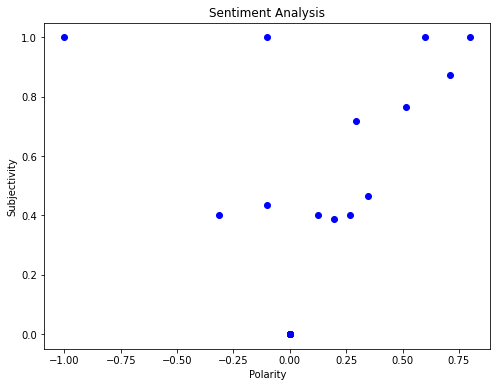

80.0
20.0


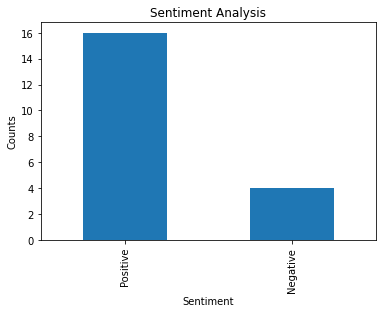

In [28]:
# Subjectivity and the polarity

class SubjectivityAndPolarity():

    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity

    def getPolarity(text):
        return TextBlob(text).sentiment.polarity

    df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
    df['Polarity'] = df['Tweets'].apply(getPolarity)

    # print(df)

    # Plot the word cloud
    allword = ' '.join([twts for twts in df['Tweets']])
    # wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119)

    def getAnalysys(score):
        if score<0:
            return 'Negative'
        else:
            return 'Positive'

    df['Analysis'] = df['Polarity'].apply(getAnalysys)


    # print all positive tweets
    print('*****Positive Tweets*****')
    j = 1
    sortedDF = df.sort_values(by=['Polarity'])
    for i in range(0,sortedDF.shape[0]):
        if (sortedDF['Analysis'][i]=='Positive'):
            print(str(j) + ')'+ sortedDF['Tweets'][i])
            print()
            j +=1


    # print all negative tweets
    print('*****Negative Tweets*****')
    j = 1
    sortedDF = df.sort_values(by=['Polarity'], ascending='False')
    for i in range(0,sortedDF.shape[0]):
        if (sortedDF['Analysis'][i]=='Negative'):
            print(str(j) + ')'+ sortedDF['Tweets'][i])
            print()
            j +=1


    # Plot Polarity vs Subjectivity

    plt.figure(figsize=(8,6))
    for i in range(0,df.shape[0]):
        plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')

    plt.title('Sentiment Analysis')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.show()

    # Get the percentage of positive tweets
    ptweets = df[df.Analysis == 'Positive']
    ptweets = ptweets['Tweets']
    percent = round((ptweets.shape[0] / df.shape[0]) * 100, 1)
    print(percent)


    # Get the percentage of negative tweets
    ntweets = df[df.Analysis == 'Negative']
    ntweets = ntweets['Tweets']
    percent = round((ntweets.shape[0] / df.shape[0]) * 100, 1)
    print(percent)


    # Show value counts

    df['Analysis'].value_counts()

    # Plot and visualize the counts
    plt.title('Sentiment Analysis')
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    df['Analysis'].value_counts().plot(kind='bar')
    plt.show()